# Test 5 - Random-think and gameplay logging

In [23]:
! tar czf Testing.tar *

In [ ]:
! nvidia-smi

In [1]:
import pickle
import random
import math

In [2]:
import sys
sys.path.append("../Self-evaluation")

from self_evaluation import play, LLMAgentSelfEvaluate

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

# Instance variables

In [3]:
levels = {"coin_collector": 14, "cooking": 8, "treasure_hunter": 27}
seeds = range(1,11)
n_think_indices = [0, 10, "r5"]
n_episodes = 1
max_steps = 100

# Game generation

Better to reuse already generated games.

In [12]:
# seed 10 of levels 11-12-13-14 of coin collector
!tw-make tw-coin_collector --seed 10 --level 11 --output games/coin_collector/level11-seed10.z8
!tw-make tw-coin_collector --seed 10 --level 12 --output games/coin_collector/level12-seed10.z8
!tw-make tw-coin_collector --seed 10 --level 13 --output games/coin_collector/level13-seed10.z8
!tw-make tw-coin_collector --seed 10 --level 14 --output games/coin_collector/level14-seed10.z8

Global seed: 10
Game generated: /TextWorld/notebooks/LLM-PTG/Code/Testing/games/coin_collector/level11-seed10.z8
Global seed: 10
Game generated: /TextWorld/notebooks/LLM-PTG/Code/Testing/games/coin_collector/level12-seed10.z8
Global seed: 10
Game generated: /TextWorld/notebooks/LLM-PTG/Code/Testing/games/coin_collector/level13-seed10.z8
Global seed: 10
Game generated: /TextWorld/notebooks/LLM-PTG/Code/Testing/games/coin_collector/level14-seed10.z8


# Log generation

In [ ]:
game = "treasure_hunter"
level = 13

for seed in seeds:
    play(LLMAgentSelfEvaluate(selfeval_turns=5, random_selfeval = True,
                              verbose=False, log=f"logs/{game}/level{level}-seed{seed}.log"),
     path=f"games/{game}/level{level}-seed{seed}.z8", max_steps=max_steps, n_episodes=n_episodes)

In [ ]:
game = "cooking"
level = 1

for seed in seeds:
    play(LLMAgentSelfEvaluate(selfeval_turns=5, random_selfeval = True,
                              verbose=False, log=f"logs/{game}/level{level}-seed{seed}.log"),
     path=f"games/{game}/level{level}-seed{seed}.z8", max_steps=max_steps, n_episodes=n_episodes)

In [ ]:
game = "coin_collector"
level = 6

for seed in seeds:
    play(LLMAgentSelfEvaluate(selfeval_turns=5, random_selfeval = True,
                              verbose=False, log=f"logs/{game}/level{level}-seed{seed}.log"),
     path=f"games/{game}/level{level}-seed{seed}.z8", max_steps=max_steps, n_episodes=n_episodes)

# Game running - random-think on the first 9 levels of all three games

In [ ]:
for game in levels.keys():
    for level in range(1, 10):
        results_all_seeds = []
        for seed in seeds:
            results = play(LLMAgentSelfEvaluate(selfeval_turns=5, random_selfeval = True,
                                                verbose=False, log=f"logs/{game}/r5think_level{level}-seed{seed}.log"),
                           f"games/{game}/level{level}-seed{seed}.z8", max_steps=max_steps, n_episodes=n_episodes)
            results_all_seeds.append(results[0]) # only one episode
        with open(f"./Testing 4/r5think_{game}_level{level}.pickle", "wb") as f:
            pickle.dump(results_all_seeds, f) # so we dump already with grouping by seed!!
            print("Data pickled.")
            f.close()

### Extra runs

In [ ]:
for game in levels.keys():
    for level in range(1, levels[game]+1):
        if (game == "coin_collector" and level <= 13) or (game == "treasure_hunter" and level <= 12) or (game == "cooking" and level <= 6):
            continue # skip runs we've already done
        results_all_seeds = []
        for seed in seeds:
            results = play(LLMAgentSelfEvaluate(selfeval_turns=5, random_selfeval=True,
                                                verbose=False, log=f"logs/{game}/r5think_level{level}-seed{seed}.log"),
                           f"games/{game}/level{level}-seed{seed}.z8", max_steps=max_steps, n_episodes=n_episodes)
            results_all_seeds.append(results[0]) # only one episode
        with open(f"./Testing 4/r5think_{game}_level{level}.pickle", "wb") as f:
            pickle.dump(results_all_seeds, f) # so we dump already with grouping by seed!!
            print("Data pickled.")
            f.close()

games/coin_collector/level14-seed1.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1.
games/coin_collector/level14-seed2.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1.
games/coin_collector/level14-seed3.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1.
games/coin_collector/level14-seed4.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1.
games/coin_collector/level14-seed5.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1.
games/coin_collector/level14-seed6.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1.
games/coin_collector/level14-seed7.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1.
games/coin_collector/level14-seed8.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1.
games/coin_collector/level14-seed9.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1.
games/coin_collector/level14-seed10.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1.
Data pickled.
games/cooking/level7-seed1.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 11.
games/cooking/level7-seed2.z8 .  	avg. steps: 100.0; avg. score:  4.0 / 11.
gam

/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action 'slice red potato with knife


You slice the red potato.


Your score has just gone up by one point.


>                                                                                                                                -= Kitchen =-6/54' was truncated to 'slice red potato with knife


You slice the red potato.


Your score has just gone up by one point.


>                                                                                               '.
  warnings.warn(msg, TruncatedInputActionWarning)
/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action 'drop red potato


The red potato is already here.


>                                                                                    

.  	avg. steps: 100.0; avg. score:  6.0 / 11.
games/cooking/level8-seed4.z8 .  	avg. steps: 100.0; avg. score:  4.0 / 11.
games/cooking/level8-seed5.z8 .  	avg. steps: 100.0; avg. score:  3.0 / 11.
games/cooking/level8-seed6.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 11.
games/cooking/level8-seed7.z8 .  	avg. steps: 100.0; avg. score:  2.0 / 11.
games/cooking/level8-seed8.z8 

# Data aggregation for visualization

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bootstrap

In [6]:
max_scores_cooking = [5, 8, 11, 5, 8, 11, 11, 11, 11]

In [7]:
coin_nothink = []
coin_nothink_ci = []
coin_10think = []
coin_10think_ci = []
coin_r5think = []
coin_r5think_ci = []
treasure_nothink = []
treasure_nothink_ci = []
treasure_10think = []
treasure_10think_ci = []
treasure_r5think = []
treasure_r5think_ci = []
cooking_nothink = []
cooking_nothink_ci = []
cooking_10think = []
cooking_10think_ci = []
cooking_r5think = []
cooking_r5think_ci = []

final_arrays = {"coin_collector": {0: (coin_nothink, coin_nothink_ci), 10: (coin_10think, coin_10think_ci), "r5": (coin_r5think, coin_r5think_ci)},
                "treasure_hunter": {0: (treasure_nothink, treasure_nothink_ci), 10: (treasure_10think, treasure_10think_ci), "r5": (treasure_r5think, treasure_r5think_ci)},
                "cooking": {0: (cooking_nothink, cooking_nothink_ci), 10: (cooking_10think, cooking_10think_ci), "r5": (cooking_r5think, cooking_r5think_ci)}}

for n in n_think_indices:
    for game in levels.keys():
        for level in range(1, levels[game]+1):
            results_all_seeds = []
            try:
                with open(f"./Testing 4/{n}think_{game}_level{level}.pickle", "rb") as f:
                    results_all_seeds = pickle.load(f)
                    f.close()
                final_scores = [run[-1][1] for run in results_all_seeds] # last step, score
                if game == "cooking":
                    final_scores = np.array(final_scores) / max_scores_cooking[level - 1] # we need to normalize the results of cooking
                avg_final_score = np.mean(final_scores)
                bootstrap_results = bootstrap(data=(final_scores,), 
                                    statistic=np.mean,
                                    method="basic",
                                    n_resamples=1000,
                                    confidence_level=0.9)
                final_arrays[game][n][0].append(avg_final_score)
                final_arrays[game][n][1].append((bootstrap_results.confidence_interval.high, bootstrap_results.confidence_interval.low))
            except: # we'll skip if we don't have that data
                continue

# Visualization

In [8]:
figsize=(12,20)

In [9]:
ylims_FM = {"coin_collector": (0,1),
         "cooking": (0, 0.5),
         "treasure_hunter": (0.1, 1)}

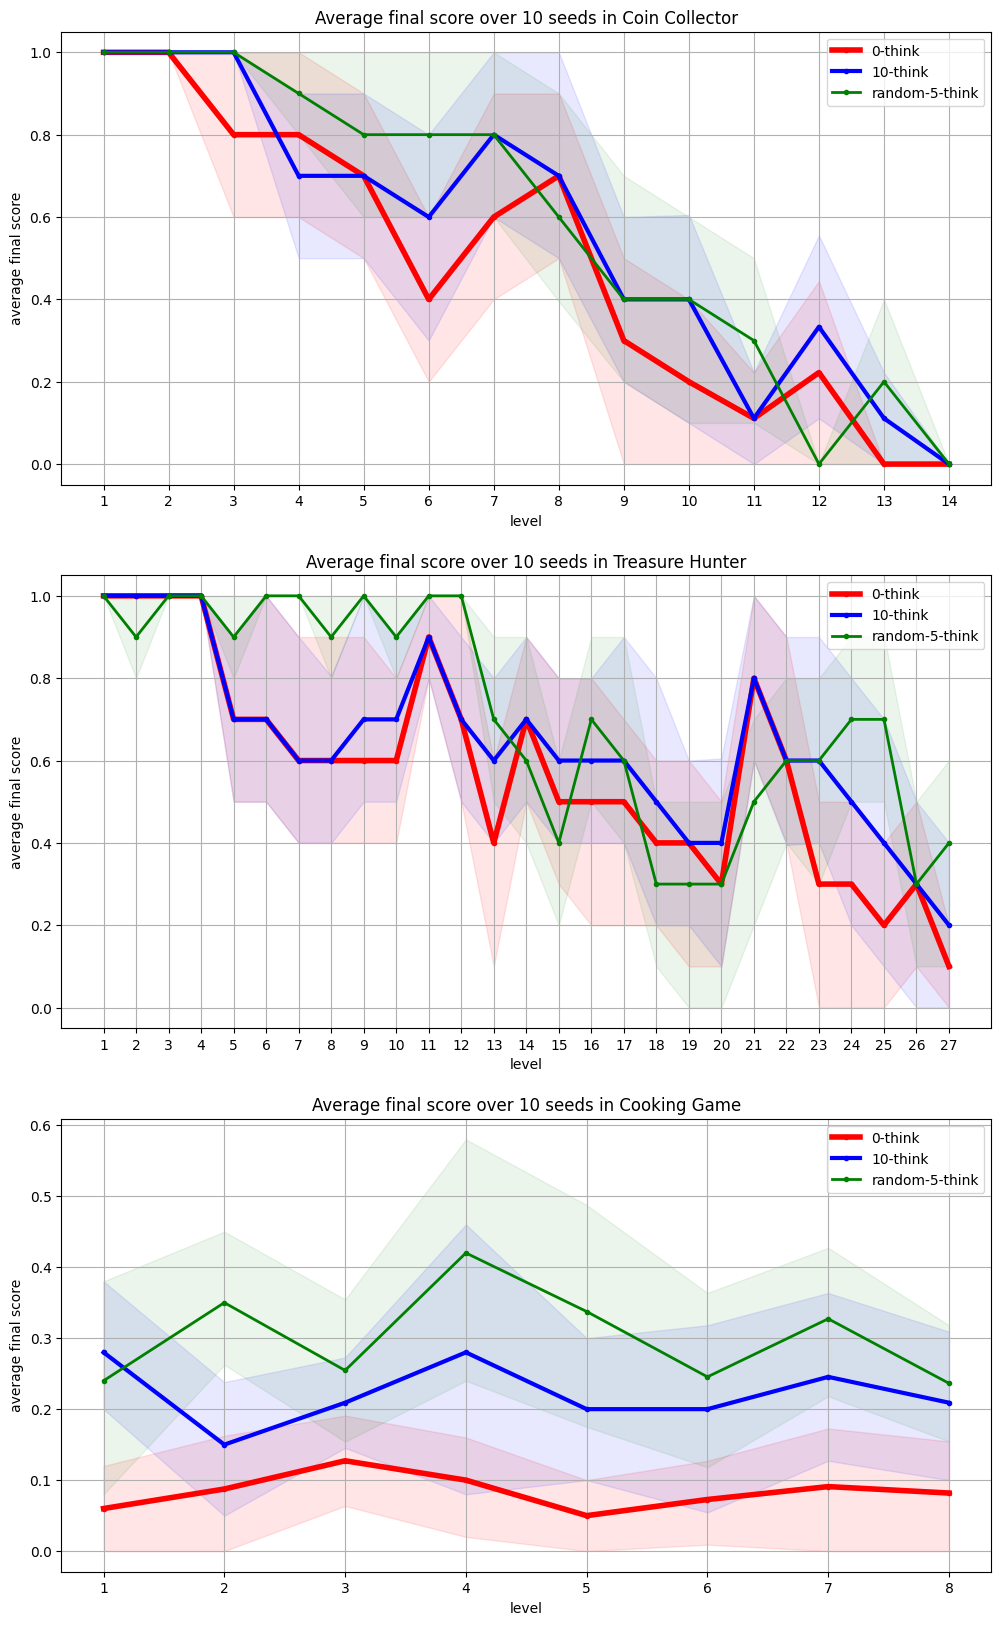

In [10]:
fig, axes = plt.subplots(3,1, figsize=figsize)
prettified_names = {"coin_collector": "Coin Collector", "treasure_hunter": "Treasure Hunter", "cooking": "Cooking Game"}

for i, game in enumerate(final_arrays.keys()):
    ax = axes[i]
    x = list(range(1, levels[game]+1))
    y_0, y_0_ci = final_arrays[game][0]
    y_10, y_10_ci = final_arrays[game][10]
    y_r5, y_r5_ci = final_arrays[game]["r5"]

    ax.fill_between(x,
                    np.clip([i[0] for i in y_0_ci], 0, 1),
                    np.clip([i[1] for i in y_0_ci], 0, 1),
                    alpha=0.1, color="red")
    ax.fill_between(x,
                    np.clip([i[0] for i in y_10_ci], 0, 1),
                    np.clip([i[1] for i in y_10_ci], 0, 1),
                    alpha=0.09, color="blue")
    ax.fill_between(x[:len(y_r5_ci)],
                    np.clip([i[0] for i in y_r5_ci], 0, 1),
                    np.clip([i[1] for i in y_r5_ci], 0, 1),
                    alpha=0.08, color="green")

    ax.plot(x, y_0, label="0-think", marker=".", linestyle="-", color="red", linewidth=4)
    ax.plot(x, y_10, label="10-think", marker=".", linestyle="-", color="blue", linewidth=3)
    ax.plot(x[:len(y_r5)], y_r5, label="random-5-think", marker=".", linestyle="-", color="green", linewidth=2)
    
    ax.set_title(f"Average final score over 10 seeds in {prettified_names[game]}")
    ax.set_xlabel('level')
    ax.set_ylabel('average final score')
    ax.legend()

    ax.set_xticks(x)
    # ax.set_ylim(ylims_FM[game][0], ylims_FM[game][1])
    ax.grid()

plt.show()